In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
df=pd.read_csv(r'E:/output_3.csv')
pd.set_option('display.max_columns', None)
df.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb,temp,drycough,diarrhoea,nasal_congestion,contact
0,99.254765,1,85,1,1,1,0,0,0,1,0
1,99.254765,1,85,1,1,1,1,0,1,1,1
2,99.254765,1,85,1,1,1,0,1,0,1,0
3,99.254765,1,85,1,1,1,1,0,0,1,0
4,99.254765,1,85,1,1,1,2,1,0,0,1


In [2]:
df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb,temp,drycough,diarrhoea,nasal_congestion,contact
count,2.690012e+06,2.690012e+06,2.690012e+06,2.690012e+06,2.690012e+06,2.690012e+06,2.690012e+06,2.690012e+06,2.690012e+06,2.690012e+06,2.690012e+06
mean,1.000023e+02,4.967517e-01,5.002401e+01,4.902677e-01,5.032483e-01,5.093278e-01,1.016451e+00,5.082557e-01,5.050966e-01,5.034215e-01,9.969279e-01
std,1.129312e+00,4.999895e-01,2.904396e+01,4.999054e-01,4.999895e-01,4.999131e-01,8.211187e-01,4.999319e-01,4.999741e-01,4.999884e-01,8.154109e-01
min,9.800030e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.903878e+01,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.999305e+01,0.000000e+00,5.000000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.009617e+02,1.000000e+00,7.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
max,1.019923e+02,1.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [3]:
df.loc[df['fever']<99,'fever']=0
df.loc[df['fever']>=99,'fever']=1
df['fever'].unique()

array([1., 0.])

In [4]:
data=df.copy()
data.drop('age',inplace=True,axis=1)


In [5]:
data.drop('temp',axis=1,inplace=True)
data.head()

,fever,bodyPain,runnyNose,diffBreath,infectionProb,drycough,diarrhoea,nasal_congestion,contact
0,1.0,1,1,1,1,0,0,1,0
1,1.0,1,1,1,1,0,1,1,1
2,1.0,1,1,1,1,1,0,1,0
3,1.0,1,1,1,1,0,0,1,0
4,1.0,1,1,1,1,1,0,0,1


In [8]:
data['sum1']=0
for i in data.columns:
    data['sum1']+=data[i];
data['sum1'].mean()
print(data['sum1'])

0          12.0
1          16.0
2          14.0
3          12.0
4          14.0
5          20.0
6          14.0
7          16.0
8          14.0
9          18.0
10         14.0
11         14.0
12         10.0
13         16.0
14         14.0
15         18.0
16         10.0
17         18.0
18         14.0
19         14.0
20         18.0
21         14.0
22         18.0
23         14.0
24         12.0
25         16.0
26         16.0
27         20.0
28         14.0
29         18.0
           ... 
2689982     8.0
2689983     8.0
2689984    10.0
2689985     8.0
2689986    10.0
2689987     8.0
2689988    10.0
2689989    10.0
2689990     8.0
2689991    10.0
2689992    12.0
2689993    10.0
2689994    10.0
2689995    12.0
2689996    12.0
2689997     6.0
2689998    10.0
2689999    12.0
2690000    12.0
2690001    10.0
2690002    10.0
2690003    10.0
2690004     8.0
2690005     6.0
2690006    10.0
2690007    10.0
2690008    10.0
2690009    10.0
2690010     8.0
2690011     6.0
Name: sum1, Length: 2690

In [9]:
from sklearn.metrics import accuracy_score
for i in range(6,18):
    data_copy=data.copy()
    data_copy.loc[data_copy['sum1']<i,'sum1']=0
    data_copy.loc[data_copy['sum1']>=i,'sum1']=1
    print(i,accuracy_score(data['infectionProb'],data_copy['sum1']))

6 0.5335779171245333
7 0.5734085944598016
8 0.5734085944598016
9 0.6153660281069379
10 0.6153660281069379
11 0.6239355066074055
12 0.6239355066074055
13 0.5896267377245901
14 0.5896267377245901
15 0.5394068874042197
16 0.5394068874042197
17 0.5049847361275712


In [10]:
#AS we see 12 has the maximum accuracy we take as the threshold 

In [10]:
data.loc[data['sum1']<12,'sum1']=0
data.loc[data['sum1']>=12,'sum1']=1

In [12]:
data['sum1']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
7          1.0
8          1.0
9          1.0
10         1.0
11         1.0
12         0.0
13         1.0
14         1.0
15         1.0
16         0.0
17         1.0
18         1.0
19         1.0
20         1.0
21         1.0
22         1.0
23         1.0
24         1.0
25         1.0
26         1.0
27         1.0
28         1.0
29         1.0
          ... 
2689982    0.0
2689983    0.0
2689984    0.0
2689985    0.0
2689986    0.0
2689987    0.0
2689988    0.0
2689989    0.0
2689990    0.0
2689991    0.0
2689992    1.0
2689993    0.0
2689994    0.0
2689995    1.0
2689996    1.0
2689997    0.0
2689998    0.0
2689999    1.0
2690000    1.0
2690001    0.0
2690002    0.0
2690003    0.0
2690004    0.0
2690005    0.0
2690006    0.0
2690007    0.0
2690008    0.0
2690009    0.0
2690010    0.0
2690011    0.0
Name: sum1, Length: 2690012, dtype: float64

In [11]:
data['infectionProb']*=2
data['infectionProb'].unique()

array([2, 0], dtype=int64)

In [12]:
data['finalProb'] = data['infectionProb'] + data['sum1']

In [13]:
data['finalProb'].unique()

array([3., 2., 0., 1.])

In [14]:
df['infectionProb']=data['finalProb']
df

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb,temp,drycough,diarrhoea,nasal_congestion,contact
0,1.0,1,85,1,1,3.0,0,0,0,1,0
1,1.0,1,85,1,1,3.0,1,0,1,1,1
2,1.0,1,85,1,1,3.0,0,1,0,1,0
3,1.0,1,85,1,1,3.0,1,0,0,1,0
4,1.0,1,85,1,1,3.0,2,1,0,0,1
5,1.0,1,85,1,1,3.0,1,1,1,1,2
6,1.0,1,85,1,1,3.0,1,0,0,0,2
7,1.0,1,85,1,1,3.0,1,1,0,0,2
8,1.0,1,85,1,1,3.0,0,1,1,0,0
9,1.0,1,85,1,1,3.0,1,1,1,0,2


In [17]:
scaled_features = df.copy() #standardazing the columns
col_names = ['fever', 'age']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)

            fever  bodyPain       age  runnyNose  diffBreath  infectionProb  \
0        0.557758         1  1.204243          1           1            3.0   
1        0.557758         1  1.204243          1           1            3.0   
2        0.557758         1  1.204243          1           1            3.0   
3        0.557758         1  1.204243          1           1            3.0   
4        0.557758         1  1.204243          1           1            3.0   
5        0.557758         1  1.204243          1           1            3.0   
6        0.557758         1  1.204243          1           1            3.0   
7        0.557758         1  1.204243          1           1            3.0   
8        0.557758         1  1.204243          1           1            3.0   
9        0.557758         1  1.204243          1           1            3.0   
10       0.557758         1  1.204243          1           1            3.0   
11       0.557758         1  1.204243          1    

              Specs          Score
8           contact  331085.411408
1          bodyPain  112244.675609
3         runnyNose  104355.158698
5          drycough   90960.372480
6         diarrhoea   78397.151629
4        diffBreath   77625.766019
7  nasal_congestion   69413.349848
0             fever   32002.383146
2               age    2165.722970


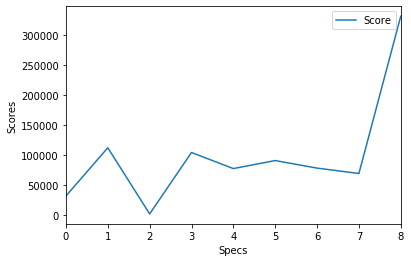

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
x=df.drop(['infectionProb','temp'],axis=1)
y=df['infectionProb']
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))
featureScores.plot()
plt.xlabel('Specs')
plt.ylabel('Scores')
plt.show()

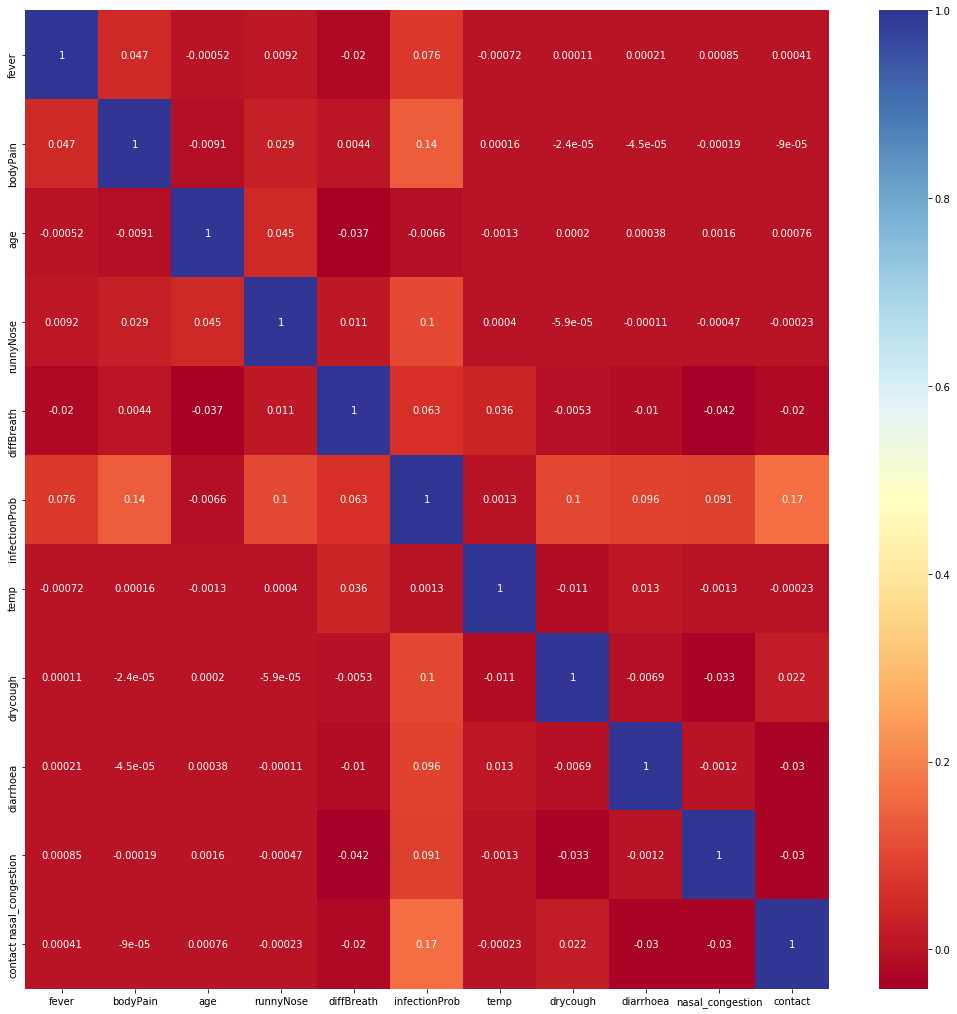

In [45]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(),cmap='RdYlBu',annot=True,ax=ax)
plt.show()

In [ ]:
#We couldn't find any highly correlated features here

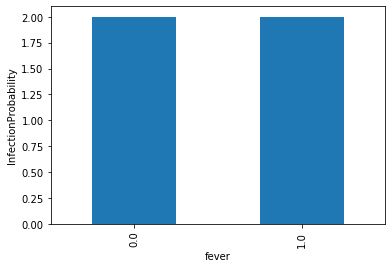

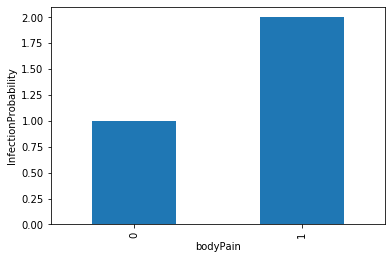

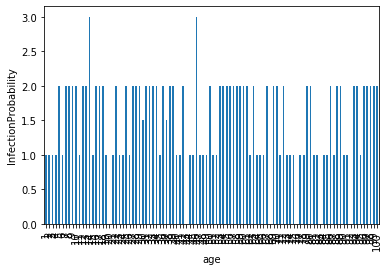

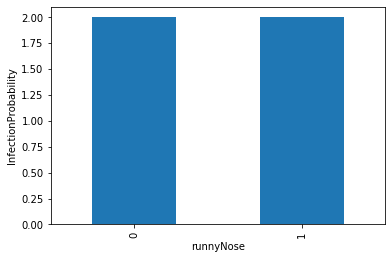

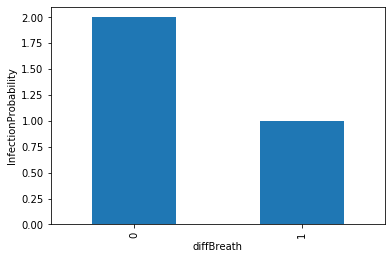

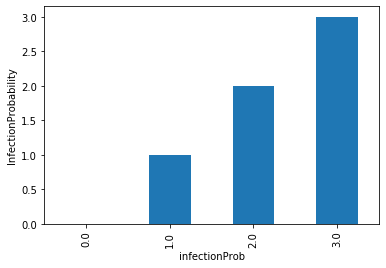

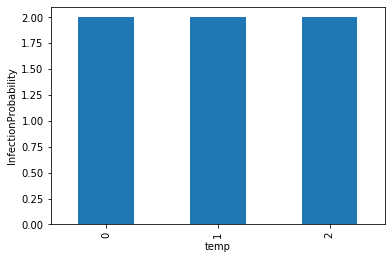

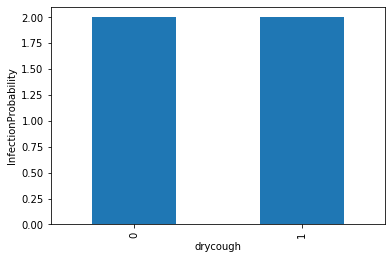

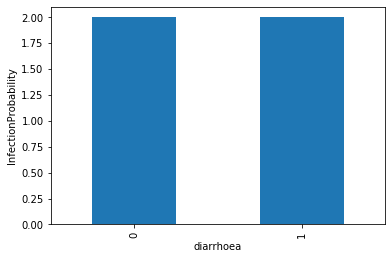

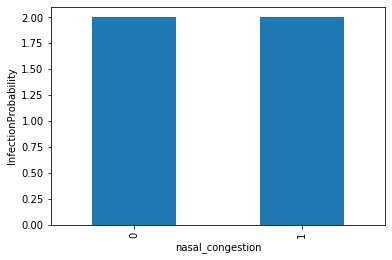

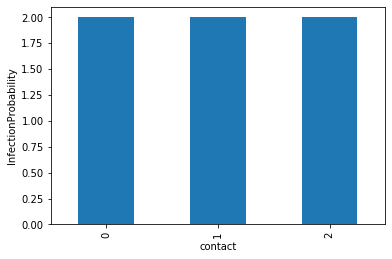

In [38]:
for feature in df.columns:
    df_copy=df.copy()
    df_copy.groupby(feature)['infectionProb'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('InfectionProbability')
    plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_temp,x_test,y_temp,y_test=train_test_split(x,y,train_size=0.2)

x_train,x_valid,y_train,y_valid=train_test_split(x_temp,y_temp,train_size=0.3)

model=RandomForestClassifier(n_estimators=100, max_depth=, min_samples_split=2, min_samples_leaf=1)
model.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
import xgboost as xgb
model_1=xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
y_pred=model.predict(x_valid)
y_pred_xgb=model_1.predict(x_valid)
print("Accuracy for RandomForestClassifier validation set",accuracy_score(y_valid,y_pred))

print("Accuracy for XGBClassifier validation set",accuracy_score(y_valid,y_pred_xgb))

Accuracy for RandomForestClassifier validation set 0.7891248586040436
Accuracy for XGBClassifier validation set 0.7604181602859252


In [27]:
y_pred_test=model.predict(x_test)
print("Accuracy for RandomForestClassifier test set",accuracy_score(y_test,y_pred_test))

Accuracy for RandomForestClassifier test set 0.7895534872049851


In [28]:
y_pred_test_xgb=model_1.predict(x_test)
print("Accuracy for XGBClassifier test set",accuracy_score(y_test,y_pred_test_xgb))

Accuracy for XGBClassifier test set 0.7600424719215989


In [43]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
temp=classification_report(y_test,y_pred)
print(temp)

[[505179      0  75459  50333]
 [     0 231016      0  62639]
 [ 79710      0 334280      0]
 [ 48010  61610      0 434773]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80    630971
         1.0       0.79      0.79      0.79    293655
         2.0       0.82      0.81      0.81    413990
         3.0       0.79      0.80      0.80    544393

    accuracy                           0.80   1883009
   macro avg       0.80      0.80      0.80   1883009
weighted avg       0.80      0.80      0.80   1883009



In [25]:
'''from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
'''

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 28, 46, 64, 82, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [26]:
#rf = RandomForestClassifier()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
#rf_random.fit(x_train,y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [44]:
import pickle
file = open('model.pkl','wb')
pickle.dump(model, file)
file.close()
   